# Launching a Space Capsule

Before we begin, here is again a cell with code to adjust some settings. Just execute it using Shift+Enter:

In [27]:
options(digits=9, repr.plot.width=5, repr.plot.height=4, scipen=5)

In our work with interest rates, you have seen this type of computation over and over:

```
new_value <- old_value + time_increment * rate_of_change
```

where the "time increment" was the time interval between compoundings, and the "rate of change" was the balance times the interest rate.

It turns out that, using the same math, we can also simulate launching a space capsule, by looking at the

* altitude, and the
* vertical (up and down) speed

of the capsule.

The vertical speed is the rate of change of the altitude.

We will first try out what happens if we prescribe that the capsule goes up at a constant speed. To keep things simple, we will start the capsule out at altitude 0 and (pretty arbitrarily) choose a small time increment.

In [28]:
altitude <- 0
time_increment <- 0.1
steps <- 100/time_increment
speed <- 50  # feet/second

for (i in 1:steps) {
    altitude <- altitude + time_increment * speed
}

# print final altitude
print(altitude)

[1] 5000


Modify this code to plot the altitude of the capsule over time.

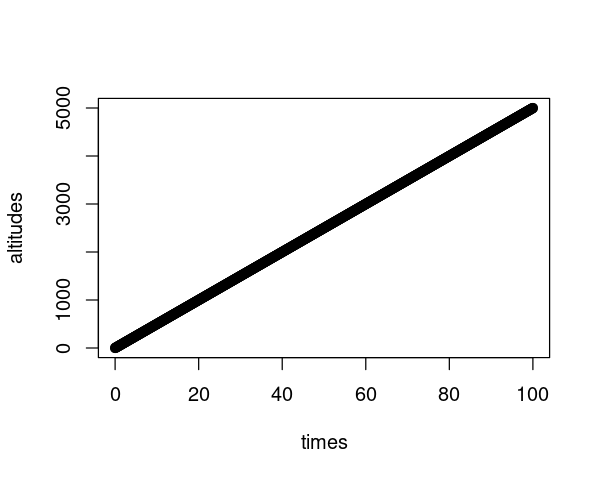

In [29]:
#clear

time <- 0
times <- c(0)
altitude <- 0
altitudes <- c(0)
time_increment <- 0.1
steps <- 100/time_increment
speed <- 50  # feet/second

for (i in 1:steps) {
    time <- time + time_increment
    altitude <- altitude + time_increment * speed
    altitudes <- c(altitudes, altitude)
    times <- c(times, time)
}

plot(times, altitudes)

If you've watched a rocket launch on TV, you've probably noticed that the rocket goes slowly at first and then speeds up. Let's try to model that by setting the speed equal to 50 times the time. Repeat your calculation from above, with that change.

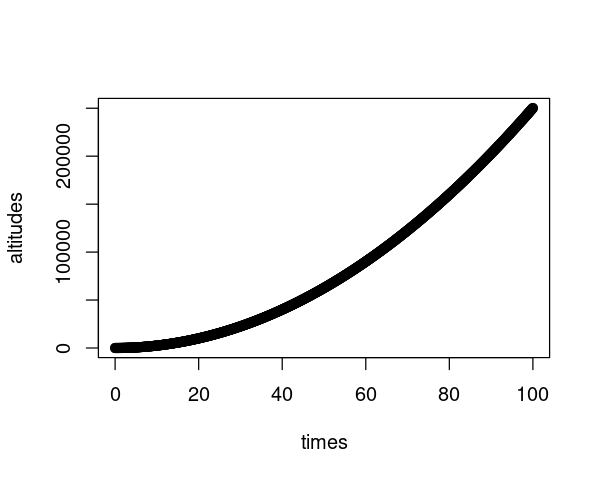

In [30]:
#clear

time <- 0
times <- c(0)
altitude <- 0
altitudes <- c(0)
time_increment <- 0.1
steps <- 100/time_increment

for (i in 1:steps) {
    time <- time + time_increment
    altitude <- altitude + time_increment * 50 * time
    altitudes <- c(altitudes, altitude)
    times <- c(times, time)
}

plot(times, altitudes)

Do you recognize the curve you get?

------------

Setting the speed equal to 50 times the time is kind of hard to justify: Why would that be the case? Let's try and model this better. Realize that the speed is also subject to a rate of change in time. For this next experiment, we will (for a moment) assume that the capsule starts at ground level, but at a very high upward speed.

But gravity will, over time, decrease the speed, so we will (somewhat arbitrarily) set a rate of change for the speed of -32.

In [22]:
altitude <- 0
speed <- 2000
time_increment <- 0.1
steps <- 100/time_increment

for (i in 1:steps) {
    speed <- speed + time_increment * (-32)
    altitude <- altitude + time_increment * speed
}

# print final altitude
print(altitude)

[1] 39840


Again, add plotting code to see what's going on:

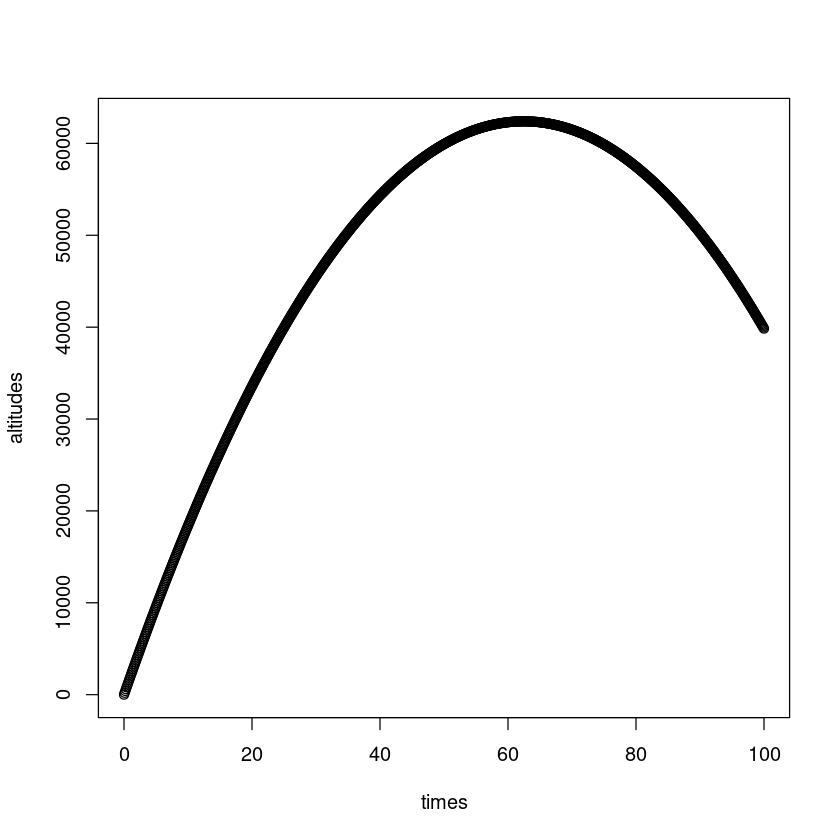

In [23]:
#clear

time <- 0
times <- c(0)
altitude <- 0
altitudes <- c(0)
speed <- 2000
time_increment <- 0.1
steps <- 100/time_increment

for (i in 1:steps) {
    time <- time + time_increment
    speed <- speed + time_increment * (-32)
    altitude <- altitude + time_increment * speed
    altitudes <- c(altitudes, altitude)
    times <- c(times, time)
}

plot(times, altitudes)

## Conditionals

It's kind of unrealistic that the capsule starts out at ground level with a super-high speed. Let's work to make that more realistic, too. So we will need to model the rocket that the capsule sits on top of. The rocket, ultimately, just provides an upward change of the speed. Let's say, it applies a rate of change of 100 (in the upward direction!) to the speed. Every rocket runs out of fuel eventually though, so it won't do that forever. Let's say it stops when the time reaches 30 seconds.

To model that, we will learn one more programming concept: Conditionals. They look like this:
```
if (time < 30) {
    # upward speed change from the rocket, minus gravity
    speed <- speed + time_increment * (-32 + 100)
}
else {
    # just gravity
    speed <- speed + time_increment * (-32)
}
```
They do what you probably already suspect: If the condition (`time < 30` in our case) is true, then the code in the first set of curly braces is executed, otherwise the code in the second, after the `else`.

Incorporate this model of the rocket into your previous program, set the initial speed to zero and see what happens:

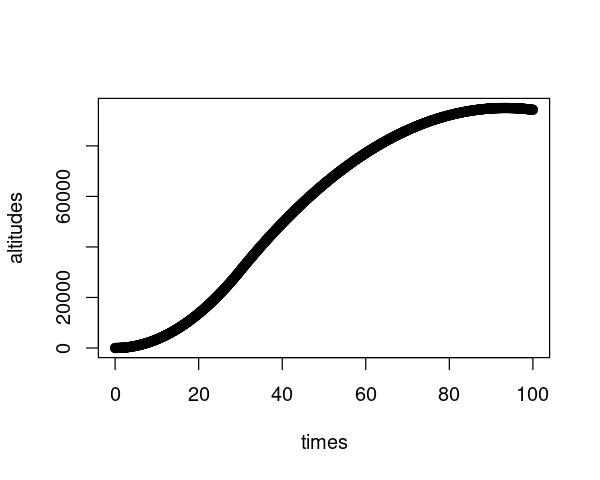

In [31]:
#clear

time <- 0
times <- c(0)
altitude <- 0
altitudes <- c(0)
speed <- 0
time_increment <- 0.1
steps <- 100/time_increment

for (i in 1:steps) {
    time <- time + time_increment
    if (time < 30) {
        # upward speed change from the rocket, minus gravity
        speed <- speed + time_increment * (-32 + 100)
    }
    else {
        # just gravity
        speed <- speed + time_increment * (-32)
    }
    altitude <- altitude + time_increment * speed
    altitudes <- c(altitudes, altitude)
    times <- c(times, time)
}

plot(times, altitudes)

That brings us to the end of this activity, thank you for playing!

------------------------------

If you're feeling adventurous, you could try to also model the following things that folks who build rockets in real life have to take into account:

- Gravity decrease with altitude. You can find the [escape velocity](https://en.wikipedia.org/wiki/Escape_velocity).
- Aerodynamic drag (speed decrease proportional to speed)
    - Decreases with altitude
- Rocket gradually loses thrust
- How do the answers change if you change the `time_increment`?